# Astrobee Quaternion

In [1]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

Vector = Tuple[float, float, float]
Quaternion = Tuple[float, float, float, float]

Quaternion Multiplication is
$q_1 \times q_2 = (s_1v_2 + s_2v_1 + v1 \times v2 , s_1 s_2 - v_1 \cdot v_2)$

In [130]:
def vector_size(v: Vector):
    return math.sqrt(sum(np.power(v, 2)))


def rotate_vector_by_quaternion(v: Vector, q: Quaternion):
    # https://gamedev.stackexchange.com/questions/28395/rotating-vector3-by-a-quaternion
    u = q[:3]
    s = q[3]
    return (
        2.0 * np.dot(u, v) * u
        + np.dot(s * s - np.dot(u, u), v)
        + 2.0 * s * np.cross(u, v)
    )


def vector_angle(v1: Vector, v2: Vector):
    return math.acos(np.dot(v1, v2) / (vector_size(v1) * vector_size(v2)))


def quaternion_multiply(q1: Quaternion, q2: Quaternion):
    s1 = q1[3]
    v1 = q1[:3]
    s2 = q2[3]
    v2 = q2[:3]
    res = s1 * v2 + s2, v1 + np.cross(v1, v2)
    return np.append(res, s1 * s2 - np.dot(v1, v2))


def quaternion_diff(q1: Quaternion, q2: Quaternion):
    return quaternion_multiply(q1, np.append(np.dot(-1, q2[:3]), q2[3]))


vector_angle(V, resV)

0.996668628288


0.0780204996145224

In [112]:
# bad case
Q1 = np.array((-0.098, -0.09, -0.729, 0.671))
Q2 = np.array((-0.13, -0.112, -0.728, 0.664))
quaternion_diff(Q1, Q2)

array([ 0.75123 ,  0.739152,  1.152488, -0.081872, -0.113426, -0.728276,
        0.999076])

In [70]:
# bad case
V = rotate_vector_by_quaternion((1, 0, 0), Q1)
resV = rotate_vector_by_quaternion((1, 0, 0), Q2)
V, resV, math.degrees(vector_angle(V, resV))

(array([-0.079696, -0.960678,  0.263664]),
 array([-0.084732, -0.937664,  0.338016]),
 4.4702453434141995)

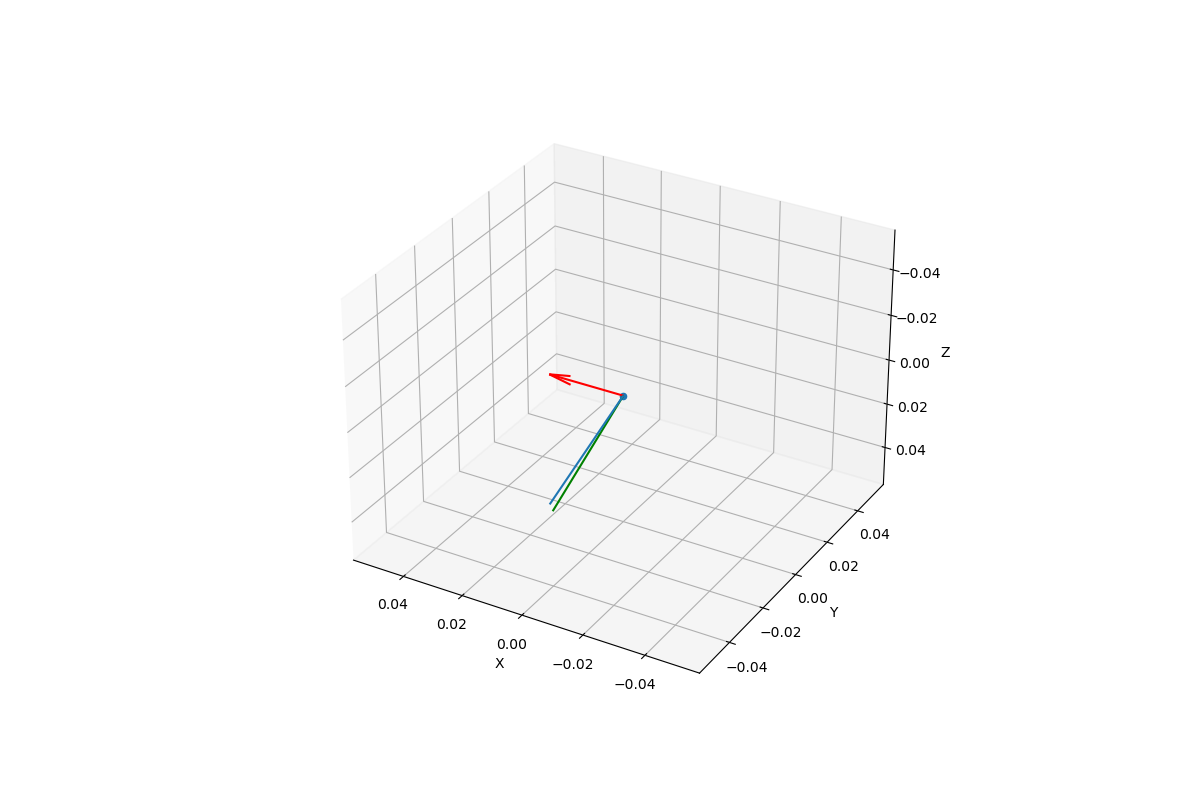

In [27]:
%matplotlib widget
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.invert_zaxis()
ax.invert_xaxis()
ax.invert_yaxis()

ax.scatter3D(0, 0, 0)
ax.quiver(0, 0, 0, 1, 0, 0, length=0.025, color="red")
ax.quiver(0, 0, 0, V[0], V[1], V[2], length=0.05, arrow_length_ratio=0)
ax.quiver(
    0, 0, 0, resV[0], resV[1], resV[2], length=0.05, color="green", arrow_length_ratio=0
)

In [21]:
# good case
V = rotate_vector_by_quaternion((1, 0, 0), np.array((-0.101, -0.09, -0.739, 0.66)))
resV = rotate_vector_by_quaternion((1, 0, 0), np.array((-0.112, -0.1, -0.734, 0.662)))
V, resV, math.degrees(vector_angle(V, resV))

(array([-0.10842 , -0.9573  ,  0.268078]),
 array([-0.097968, -0.949416,  0.296816]),
 1.8096414235867955)

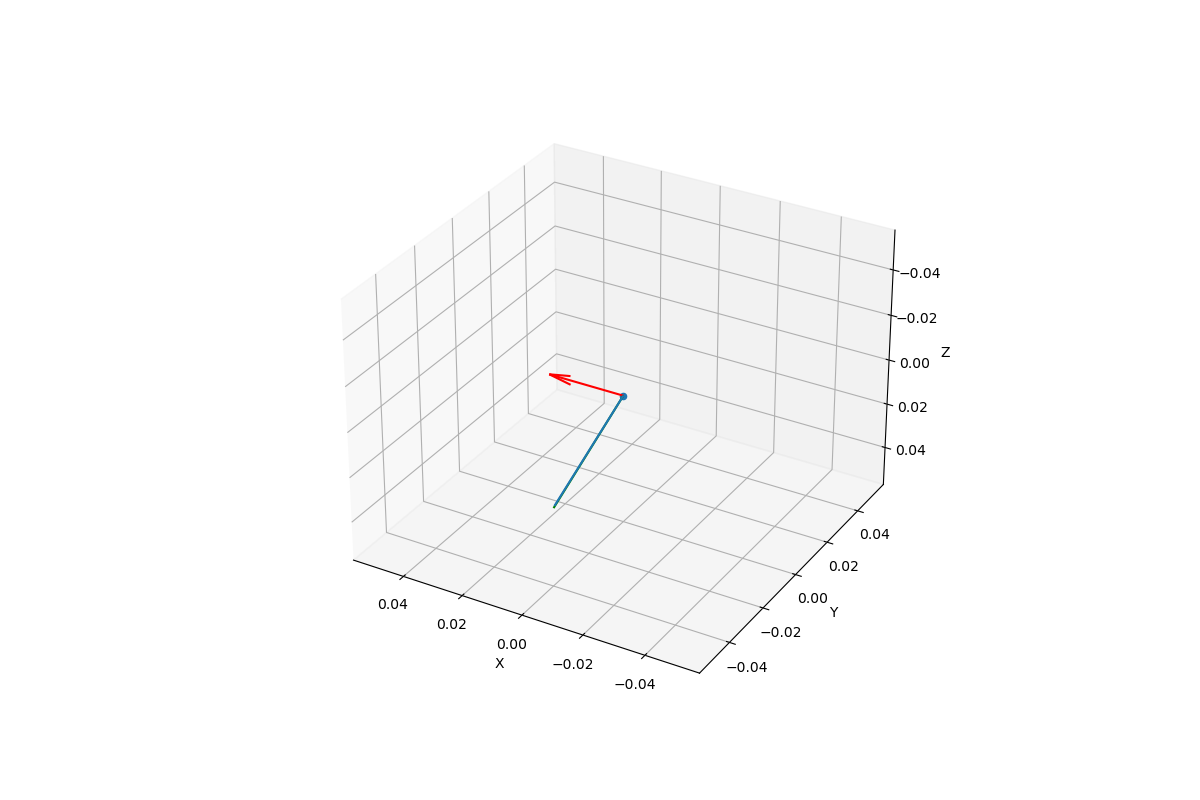

In [22]:
%matplotlib widget
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.invert_zaxis()
ax.invert_xaxis()
ax.invert_yaxis()

ax.scatter3D(0, 0, 0)
ax.quiver(0, 0, 0, 1, 0, 0, length=0.025, color="red")
ax.quiver(0, 0, 0, V[0], V[1], V[2], length=0.05, arrow_length_ratio=0)
ax.quiver(
    0, 0, 0, resV[0], resV[1], resV[2], length=0.05, color="green", arrow_length_ratio=0
)

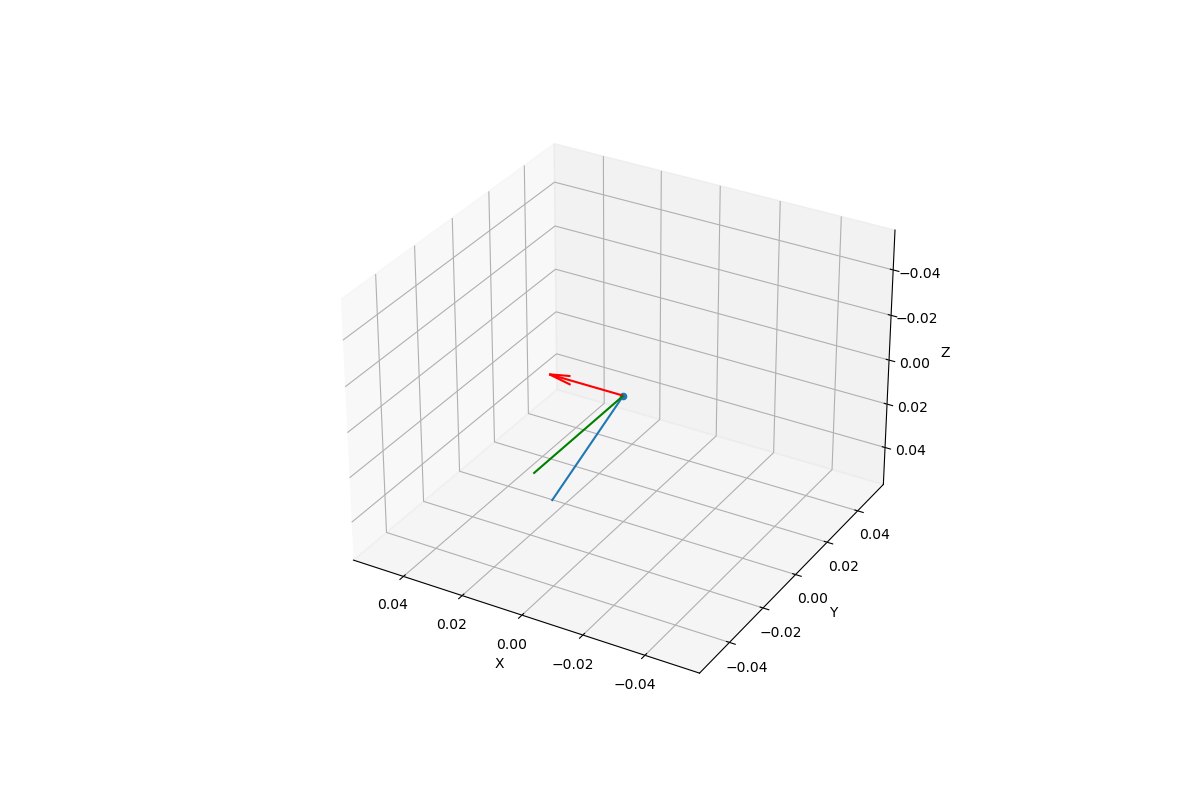

In [23]:
# Testing
%matplotlib widget
V = rotate_vector_by_quaternion((1, 0, 0), np.array((-0.082, -0.074, -0.737, 0.666)))
resV = rotate_vector_by_quaternion((1, 0, 0), np.array((0, 0, -0.707, 0.707)))


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.invert_zaxis()
ax.invert_xaxis()
ax.invert_yaxis()

ax.scatter3D(0, 0, 0)
ax.quiver(0, 0, 0, 1, 0, 0, length=0.025, color="red")
ax.quiver(0, 0, 0, V[0], V[1], V[2], length=0.05, arrow_length_ratio=0)
ax.quiver(
    0, 0, 0, resV[0], resV[1], resV[2], length=0.05, color="green", arrow_length_ratio=0
)